In [1]:
from PIL import Image
from IPython import display
import numpy as np
import cv2

def ld():
    return open("16.txt").read()


def bp(n):
    pat=[0,1,0,-1]
    i=0
    while 1:
        i+=1
        yield [0,1,0,-1][(i//n)%4]

def phase(I,z):
    o=[]
    for i in range(len(I)):
        g=bp(i+1)
        x=0
        for j,v in enumerate(I):
            x+=v*next(g)
        o.append(int(str(x)[-1]))
    I=o
    return I

def p1(i,n):
    i=[int(x) for x in i]
    
    for x in range(n):
        i=phase(i,x)
        #print("".join([str(x) for x in i]))
        
    i=[str(x) for x in i]
    return "".join(i[:8])

"""
test generator
for i in range(5):
    v=[]
    g=bp(i+1)
    for j in range(15):
        v.append(next(g))
    print(i+1, "".join(["%3d"%(x) for x in v]))
    #print(i+1, v)
"""

"""
print("test1:",p1("12345678",4), "01029498")
print("test2:",p1("80871224585914546619083218645595",100), "24176176")
print("test3:",p1("19617804207202209144916044189917",100), "73745418")
print("test4:",p1("69317163492948606335995924319873",100), "52432133")
"""
print("part1:",p1(ld(),100), "70856418")




part1: 70856418 70856418


In [2]:
#after much reading at reddit it seems that there is a pettern in the phase generation
#it goes like this. From right to left the next phase calculation is the last with slight changes
#that can be exploited to make a list of operations that need to be added to the last value.
#the higher index also means that less work ned to be fone from~ 6e6 to 6e5
def sq(p):
    return "".join([str(x) for x in p])

def s(inp,depth,inpmul=1,ix=0):
    inp=[int(x) for x in inp]
    l=len(inp)
    L=l*inpmul-ix
    
    print("make optable",L)
    
    #make list of ops needed to adjust
    #current from right value
    ops=[[] for x in range(L)]
    for level in reversed(range(L)):
        if level%100==0:
            pass
            #print(level)
        for ixx in range(L):
            pv0=pat(ixx,level)
            if level==L-1:
                #print("@@@")
                if pv0:
                    ops[level].append((ixx,pv0))
            else:
                #print("+++")
                pv1=pat(ixx,level+1)
                if pv0!=pv1:
                    ops[level].append((ixx,pv0-pv1))
        
    
    print("optable done")
    for i,e in enumerate(ops):
        pass
        #print(i,len(e),e)
    
    p=[inp[(x+ix)%l] for x in range(L)]
    
    #print(ops)
    #print("start  ",sq(p[:8]))
    for _ in range(depth):
        p2=[0 for x in range(L)]
        
        pp=0
        ixx=L-1
        while 1:
            #print("ixx",ixx) 
            #p carries last value
            for i,m in ops[ixx]:
                #print(" pim",p[i],i,m)
                pp+=p[i]*m
                #print("pp",pp)
            #print(pp)
            
            #print(pp)
            p2[ixx]=pp
            
            if ixx==0:
                break
            ixx-=1
        p=[int(str(x)[-1]) for x in p2]
        
        print("depth",_,sq(p[:8]))
        #if _ == 0:
        #    print("        48226158")
    
    return sq(p[:8])

#print("test1:",s("12345678",4), "01029498")   
#print("test1:",s("12345678",4), "01029498")
#print("test2:",s("80871224585914546619083218645595",100), "24176176")
#print("test3:",s("19617804207202209144916044189917",100), "73745418")
#print("test4:",s("69317163492948606335995924319873",100), "52432133")
ind=ld()
#print("part1:",s(ind,100), "70856418")
#print("part2:",s(ind,100,10000,int(ind[:7])), "70856418")

#optable unrealistic slow!!!


l 650 ixxx 5976521 w 6500000
0  1 0-1 0 1 0-1 0
1  0 1 1 0 0-1-1 0
2  0 0 1 1 1 0 0 0
3  0 0 0 1 1 1 1 0
4  0 0 0 0 1 1 1 1
5  0 0 0 0 0 1 1 1
6  0 0 0 0 0 0 1 1
7  0 0 0 0 0 0 0 1
5976521  1 1 1 1 1 1 1 1
5976522  0 1 1 1 1 1 1 1
5976523  0 0 1 1 1 1 1 1
5976524  0 0 0 1 1 1 1 1
5976525  0 0 0 0 1 1 1 1
5976526  0 0 0 0 0 1 1 1
5976527  0 0 0 0 0 0 1 1
5976528  0 0 0 0 0 0 0 1
(32, 32, 3)


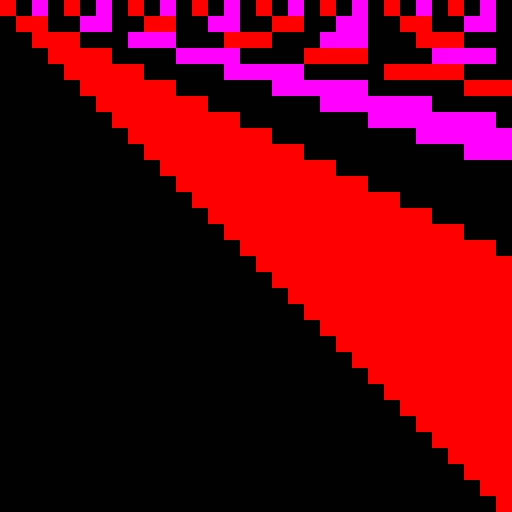

In [3]:
import numpy as np
import cv2
from PIL import Image
from IPython import display

def ld():
    return open("16.txt").read()

def s2d(s):
    return [int(x) for x in s]
def d2s(digits):
    return "".join([str(x) for x in digits])

def pat(ix,level):
    return [0,1,0,-1][((ix+1)//(level+1))%4]

d=ld()
ixxx=int(ld()[:7])
l=len(d)
ll=l*10000
d=s2d(d)
print("l",l,"ixxx",ixxx, "w", ll)
for level in range(8):
    ln=[]
    for ix in range(8):
        ln.append(pat(ix,level))
    print(level, "".join(["% 2d"%(x) for x in ln]))

for level in range(ixxx,ixxx+8):
    ln=[]
    for ix in range(ixxx,ixxx+8):
        ln.append(pat(ix,level))
    print(level, "".join(["% 2d"%(x) for x in ln]))

N=32
img= np.zeros([N,N,3]).astype(np.uint8)
print(img.shape)
for level in range(N):
    
    for ix in range(N):
        p=pat(ix,level)
        if p==1:
            img[level,ix,:]=[255,0,0]
        elif p==-1:
            img[level,ix,:]=[255,0,255]
        
F = 16

img = cv2.resize(img, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
      
display.display(Image.fromarray(img))



In [4]:
#this was hard
#read alot of hints
#watched youtube solution attempts
#took inspiration from solution thread
#
#method insights
#study pattern
#use dimension and index to determine
#we are in second half
#this part of the matrix is simpler
#
#its still a huge matrix so think optimization


dig=ld()
dig*=10000
dig=dig[int(dig[:7]):]
dig=[int(x) for x in dig]
wl=len(dig)
print("wl",wl)
for p in range(100):
    print("%4d"%(p),end="\r")
    total=None
    n=[]
    for i in range(wl):
        if i==0:
            total=sum(dig)
        else:
            total-=dig[i-1]
        n.append(int(str(total)[-1]))
    dig=n
  
print("\npart2:","".join([str(x) for x in dig[:8]]), 87766336)



wl 523479
  99
part2: 87766336 87766336
